
## Classify Iris species 


## The iris dataset

In [178]:
# import data required
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [179]:
iris_dataset = load_iris()

### keys of iris dataset

In [180]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


#### DESCR
contains the description of the dataset


In [181]:
print(iris_dataset['DESCR'][:500] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

...


#### target_names

In [182]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


#### feature_names

In [183]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### data

In [184]:
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))

Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)


In [185]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#### target

In [186]:
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))


Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)


In [187]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


0 means setosa, 1 means versicolor, and 2 means virginica.

## Testing and training data

- split the dataset into training set(75%) and test set(25%).
- train_test_split() function of scikit learn is used for it.
- X=data, y=target label

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0
)

- ```random_state``` provides the same output every time we split the dataset
- X_train contains 75%, X_test contains 25% of dataset
- dataset is shuffled for effectivenes

In [189]:
print("Training data shapes:")
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}\n".format(y_train.shape))

print("Testing data shapes:")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

Training data shapes:
X_train shape: (112, 4)
y_train shape: (112,)

Testing data shapes:
X_test shape: (38, 4)
y_test shape: (38,)


### Data Inspection


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
..                 ...               ...                ...               ...
107                4.9               3.1                1.5               0.1
108                6.3               2.9                5.6               1.8
109                5.8               2.7                4.1               1.0
110                7.7               3.8                6.7               2.2
111                4.6               3.2                1.4               0.2

[112 rows x 4 columns]


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

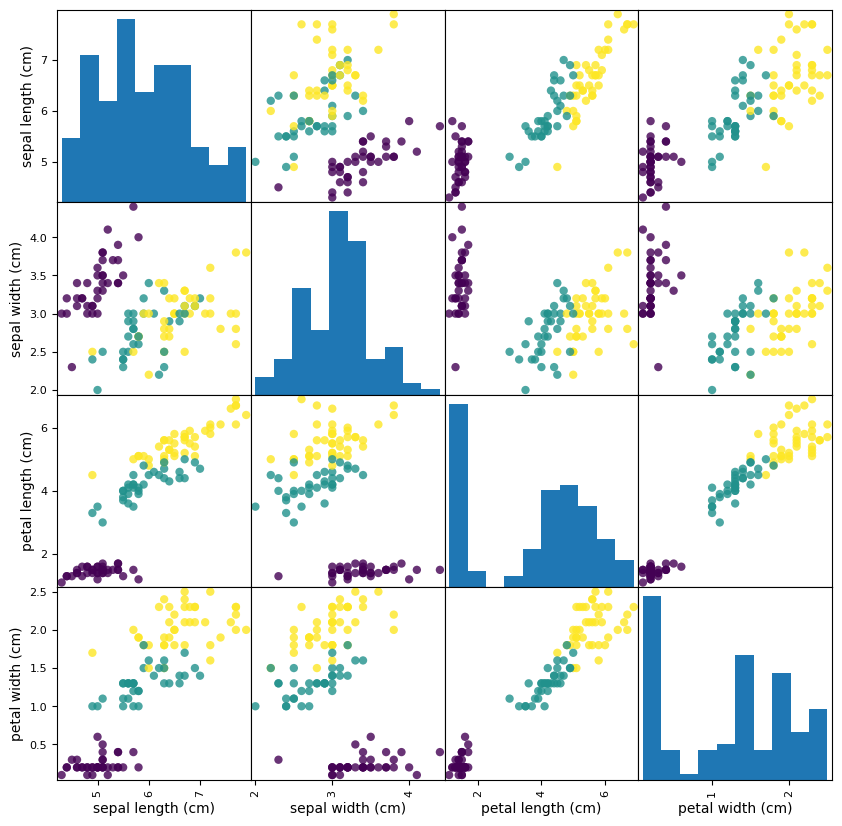

In [190]:

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
print(iris_dataframe)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10, 10),
                           marker='o', alpha=.8)

#### Building Model

- Find nearest neighbor of a test data
- the class of test data will be the nearest neighbor
- ```n_neighbors=1``` means we only use single neighbor

In [191]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

creating model on the training set

In [192]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

#### Making Predictions

- sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm. 
What species of iris would this be?

In [193]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [194]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating

The test set preditions are as follows

In [195]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


To find the accuracy of these predictions compare it with y_test test data


In [196]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
